## Цель вычислительного эксперимента
Решить задачу выбора алгоритма оптимизации на наборе данных MNIST с использованием нейронных сетей простой структуры. Выбор произвести между алгоритмами: SGD, Nesterov Momentum, Adam; по значениям скорости сходимости, значения оптимума и вида траектории. В качестве структурного параметра используется количество нейронов

##Описание выборки
Выборка состоит из 70000 изображений рукописного написания цифр размера 28×28 пикселей.

##Блок загрузки и предобработки выборки

Подключение необходимых библиотек

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import np_utils

Загрузка датасета

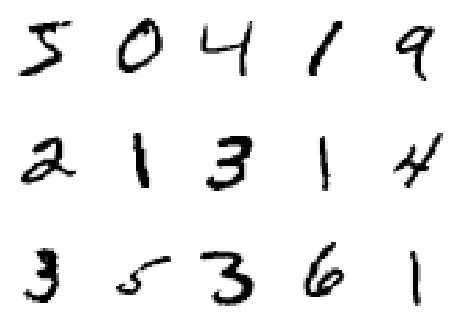

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = X_train
labels = y_train

fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

Изображение 28×28 пикселей представляется в виде массива размера 784

In [43]:
num_pixels = X_train.shape[1] * X_train.shape[2]
data = data.reshape(X_train.shape[0], num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

data = pd.DataFrame(data=data,    # values
                    index=np.arange(data.shape[0]),    # 1st column as index
                    columns=np.arange(data.shape[1]))  # 1st row as the column names
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Нормализация объектов выборки: из 0-255 в 0-1

In [0]:
X_train = X_train/255
X_test = X_test/255

Классы (10 цифр) представляются в виде бинарных матриц размера 2×2

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##Графики анализа состава выборки

###Анализ выбросов, гистограмма







/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


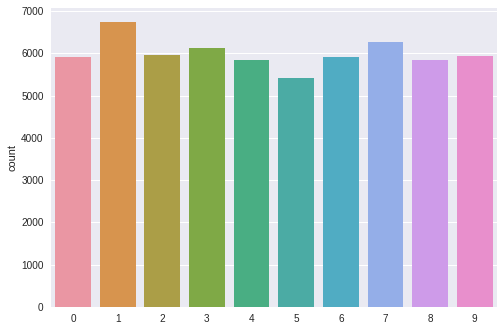

In [46]:
sns.countplot(labels)

Выбросов не наблюдается

###Анализ пропусков, статистика

In [47]:
data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

В выборке нет пропусков или испорченных данных

###Анализ мультикорелляции признаков, кор. матрица

In [0]:
#corr_matrix = data.corr()

Не удалось получить наглядную корелляционную матрицу для 784 признаков

##Список моделей
Строится нейронная сеть простой стуктуры

##Список функций ошибки, критериев качества
Критерии качества, используемые в задаче:

*   скорость сходимости
*   значение оптимума
*   вид траектории





##Способ разбиения выборки на обучение-контроль
Используется разбиение, предлагаемое функцией load_data() модуля mnist библиотеки keras. А именно, 60000  и 10000 объектов на обучение и контроль соответсвенно.

##Таблица модели/выборки/критерии качества на разбиении со стандартным отклонением

##Анализ выбранной модели на разбиении обучение-контроль

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def baseline_model(optimizer='adam'):
	
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [55]:
optimizers = ['adam', 'SGD', 'nadam']
accuracy = list()
history = dict()

for optimizer in optimizers:
    model = baseline_model(optimizer)
    history[optimizer] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(scores[1])
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2807 - acc: 0.9189 - val_loss: 0.1363 - val_acc: 0.9605
Epoch 2/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1109 - acc: 0.9678 - val_loss: 0.0933 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0701 - acc: 0.9799 - val_loss: 0.0811 - val_acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0494 - acc: 0.9859 - val_loss: 0.0701 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0363 - acc: 0.9899 - val_loss: 0.0649 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0256 - acc: 0.9933 - val_loss: 0.0637 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0185 - acc: 0.9956 - val_loss: 0.0564 - 

По значению оптимума (Baseline Error) лучшим является алгоритм ADAM

###Графики скорости сходимости функции ошибки (зависимости функции ошибки от номера итерации оптимизационного алгоритма) со ст. откл.

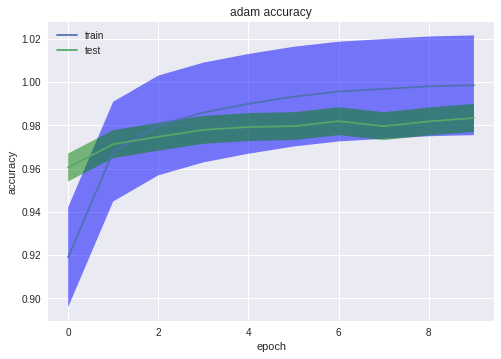

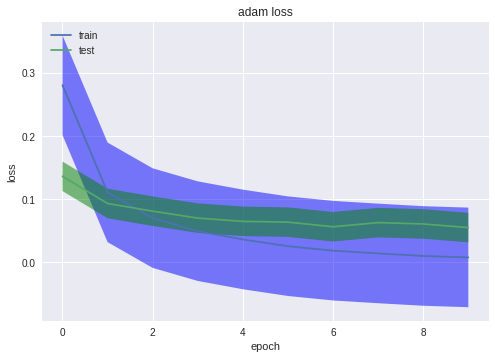

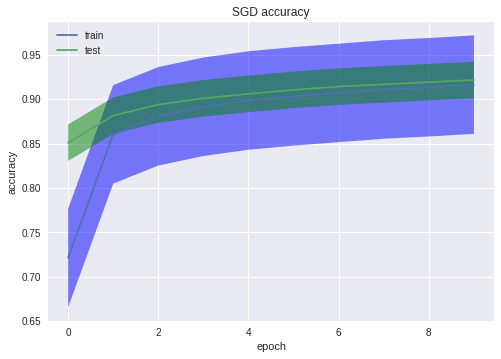

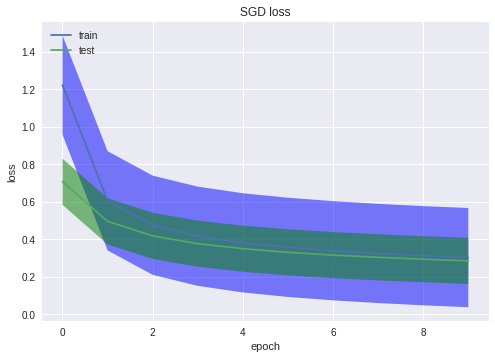

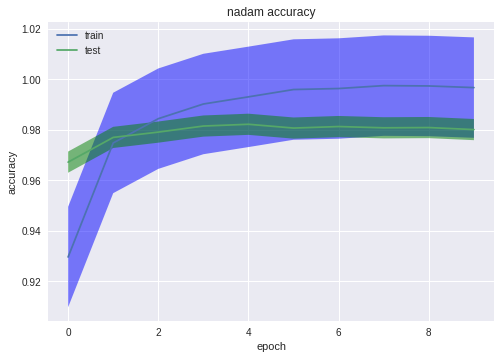

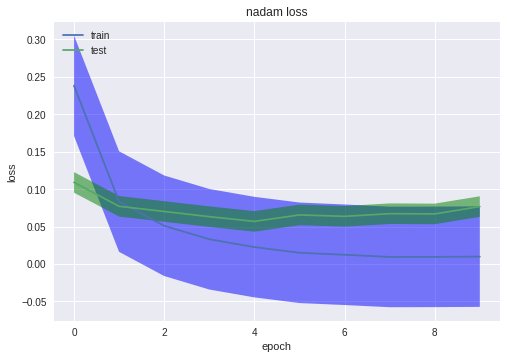

In [80]:
for optimizer in optimizers:
    # summarize history for accuracy
    t_train_acc = np.array(history[optimizer].history['acc'])
    std_train_acc = t_train_acc.std()
    t_test_acc = np.array(history[optimizer].history['val_acc'])
    std_test_acc = t_test_acc.std()
    plt.plot(t_train_acc)
    plt.fill_between(np.arange(t_train_acc.shape[0]), t_train_acc+std_train_acc,
                     t_train_acc-std_train_acc, facecolor='blue', alpha=0.5)
    plt.plot(t_test_acc)
    plt.fill_between(np.arange(t_test_acc.shape[0]), t_test_acc+std_test_acc,
                     t_test_acc-std_test_acc, facecolor='green', alpha=0.5)
    plt.title('{} accuracy'.format(optimizer))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    t_train_loss = np.array(history[optimizer].history['loss'])
    std_train_loss = t_train_loss.std()
    t_test_loss = np.array(history[optimizer].history['val_loss'])
    std_test_loss = t_test_loss.std()
    plt.plot(t_train_loss)
    plt.fill_between(np.arange(t_train_loss.shape[0]), t_train_loss+std_train_loss,
                     t_train_loss-std_train_loss, facecolor='blue', alpha=0.5)
    plt.plot(t_test_loss)
    plt.fill_between(np.arange(t_test_loss.shape[0]), t_test_loss+std_test_loss,
                     t_test_loss-std_test_loss, facecolor='green', alpha=0.5)
    plt.title('{} loss'.format(optimizer))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

По скорости сходимости также выигрывает ADAM

##Вывод
Для данной задачи среди предложенных алгоритмов оптимизации лучшим является ADAM